In [44]:
import numpy as np
import math
import torch
from torch import nn

import scipy.stats as stats
import matplotlib
import matplotlib.pyplot as plt
from livelossplot import PlotLosses
from Inference.GeNVI_method import GeNVariationalInference, GeNetEns
from Inference.GeNVI_predictive import GeNPredVI, GeNetEns

In [53]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [54]:
predictive=True


In [55]:
from Experiments.foong import Setup
layerwidth=50
nblayers=1
setup=Setup(device,layerwidth=layerwidth,nblayers=nblayers)


# Target density #

In [56]:
logprior=setup.logPredPrior
loglikelihood=setup.loglikelihood
projection=setup.projection
size_sample=setup.n_train_samples
param_count=setup.param_count
model=setup._model
logposterior=setup.logposterior

size_sample

200

# GeNVI #

In [57]:
activation = nn.Tanh()#nn.ReLU()
init_b = .001
ensemble_size=1
lat_dim=5


GeN = GeNetEns(ensemble_size, lat_dim, 50, param_count, activation, .2, init_b, device)

In [58]:
%matplotlib inline
from tempfile import TemporaryDirectory

k_MC=300


def show(x,y):
    return

if predictive:
    with TemporaryDirectory() as temp_dir:
        optimizer = GeNPredVI(loglikelihood, logprior, projection, k_MC,
                                                0, 100, 1000, 50, 50,
                                                20000, .01, .00001, 200, .5,
                                                device, True, temp_dir, save_best=True)
        best_epoch, scores=optimizer.run(GeN,show)
else:
    with TemporaryDirectory() as temp_dir:
        optimizer = GeNVariationalInference(logposterior,
                                                0, 100, 1000, 50, 100,
                                                20000, .01, .000001, 500, .5,
                                                device, True, temp_dir, save_best=True)
        best_epoch, scores=optimizer.run(GeN)
print(best_epoch)

Epoch [0/20000], Loss: 158971.828125, Entropy -607.6180419921875, Learning Rate: 0.01
Epoch [1/20000], Loss: nan, Entropy nan, Learning Rate: 0.01
Epoch [2/20000], Loss: nan, Entropy nan, Learning Rate: 0.01
Epoch [3/20000], Loss: nan, Entropy nan, Learning Rate: 0.01
Epoch [4/20000], Loss: nan, Entropy nan, Learning Rate: 0.01
Epoch [5/20000], Loss: nan, Entropy nan, Learning Rate: 0.01
Epoch [6/20000], Loss: nan, Entropy nan, Learning Rate: 0.01
Epoch [7/20000], Loss: nan, Entropy nan, Learning Rate: 0.01
Epoch [8/20000], Loss: nan, Entropy nan, Learning Rate: 0.01
Epoch [9/20000], Loss: nan, Entropy nan, Learning Rate: 0.01
Epoch [10/20000], Loss: nan, Entropy nan, Learning Rate: 0.01
Epoch [11/20000], Loss: nan, Entropy nan, Learning Rate: 0.01
Epoch [12/20000], Loss: nan, Entropy nan, Learning Rate: 0.01
Epoch [13/20000], Loss: nan, Entropy nan, Learning Rate: 0.01
Epoch [14/20000], Loss: nan, Entropy nan, Learning Rate: 0.01
Epoch [15/20000], Loss: nan, Entropy nan, Learning Rate

Epoch [135/20000], Loss: nan, Entropy nan, Learning Rate: 0.01
Epoch [136/20000], Loss: nan, Entropy nan, Learning Rate: 0.01
Epoch [137/20000], Loss: nan, Entropy nan, Learning Rate: 0.01
Epoch [138/20000], Loss: nan, Entropy nan, Learning Rate: 0.01
Epoch [139/20000], Loss: nan, Entropy nan, Learning Rate: 0.01
Epoch [140/20000], Loss: nan, Entropy nan, Learning Rate: 0.01
Epoch [141/20000], Loss: nan, Entropy nan, Learning Rate: 0.01
Epoch [142/20000], Loss: nan, Entropy nan, Learning Rate: 0.01
Epoch [143/20000], Loss: nan, Entropy nan, Learning Rate: 0.01
Epoch [144/20000], Loss: nan, Entropy nan, Learning Rate: 0.01
Epoch [145/20000], Loss: nan, Entropy nan, Learning Rate: 0.01
Epoch [146/20000], Loss: nan, Entropy nan, Learning Rate: 0.01
Epoch [147/20000], Loss: nan, Entropy nan, Learning Rate: 0.01
Epoch [148/20000], Loss: nan, Entropy nan, Learning Rate: 0.01
Epoch [149/20000], Loss: nan, Entropy nan, Learning Rate: 0.01
Epoch [150/20000], Loss: nan, Entropy nan, Learning Rat

Epoch [268/20000], Loss: nan, Entropy nan, Learning Rate: 0.005
Epoch [269/20000], Loss: nan, Entropy nan, Learning Rate: 0.005
Epoch [270/20000], Loss: nan, Entropy nan, Learning Rate: 0.005
Epoch [271/20000], Loss: nan, Entropy nan, Learning Rate: 0.005
Epoch [272/20000], Loss: nan, Entropy nan, Learning Rate: 0.005
Epoch [273/20000], Loss: nan, Entropy nan, Learning Rate: 0.005
Epoch [274/20000], Loss: nan, Entropy nan, Learning Rate: 0.005
Epoch [275/20000], Loss: nan, Entropy nan, Learning Rate: 0.005
Epoch [276/20000], Loss: nan, Entropy nan, Learning Rate: 0.005
Epoch [277/20000], Loss: nan, Entropy nan, Learning Rate: 0.005
Epoch [278/20000], Loss: nan, Entropy nan, Learning Rate: 0.005
Epoch [279/20000], Loss: nan, Entropy nan, Learning Rate: 0.005
Epoch [280/20000], Loss: nan, Entropy nan, Learning Rate: 0.005
Epoch [281/20000], Loss: nan, Entropy nan, Learning Rate: 0.005
Epoch [282/20000], Loss: nan, Entropy nan, Learning Rate: 0.005
Epoch [283/20000], Loss: nan, Entropy na

KeyboardInterrupt: 

In [19]:
nLPP_train, nLPP_validation, nLPP_test, RSE_train, RSE_validation, RSE_test=setup.evaluate_metrics(GeN(500).detach(),device)
print('nLPP: '+str(nLPP_test[0].float().cpu().numpy())+' ('+str(nLPP_test[1].float().cpu().numpy())+')')
print('Squared Error: '+str(RSE_test[0].float().cpu().numpy())+' ('+str(RSE_test[1].float().cpu().numpy())+')')

nLPP: 54.6004 (108.05851)
Squared Error: 2.354887 (4.088515)


In [22]:
N=1250
GeNVI_theta_ens=GeN.sample(N).detach().cpu()
GeNVI_theta=torch.cat([GeNVI_theta_ens[i] for i in range(ensemble_size)],dim=0)
GeNVI_theta_c=torch.cat([0.1*i*torch.ones(N) for i in range(ensemble_size)],dim=0)
GeNVI_theta.shape

torch.Size([1250, 151])

In [23]:
from sklearn.manifold import TSNE
myTSNE=TSNE(n_components=3,init='pca',perplexity=5)
X_embedded_ =myTSNE.fit_transform(GeNVI_theta.cpu())
print(myTSNE.kl_divergence_)
X_embedded_.shape

0.7773956060409546


(1250, 3)

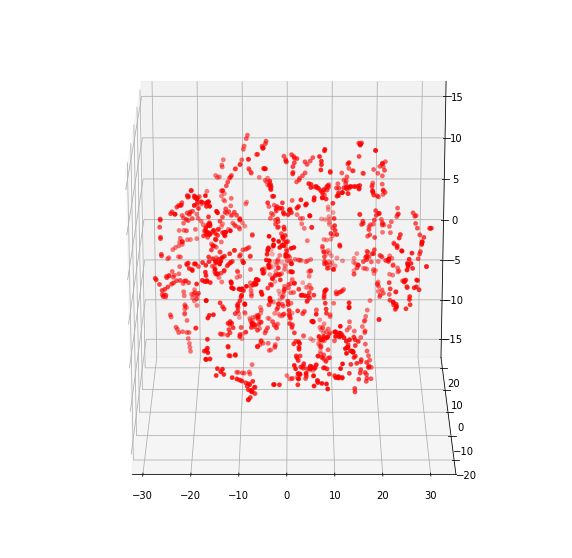

In [24]:
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

import matplotlib.patches as mpatches

import matplotlib.cm as cm
cmap = cm.hsv


fig = plt.figure(figsize=(10, 10))




G1_patch = mpatches.Patch(color=cmap(0.), label='G1')
#G2_patch = mpatches.Patch(color=cmap(.1), label='G2')
#G3_patch = mpatches.Patch(color=cmap(.2), label='G3')



ax = fig.gca(projection='3d')
ax.scatter(X_embedded_[:,0],X_embedded_[:,1],X_embedded_[:,2],color=cmap(GeNVI_theta_c), linewidth=0.2,cmap=cmap)
#plt.title('3D t-SNE of '+str(param_count)+'-dimensional transformed noise')
ax.view_init(elev=20., azim=270)

#plt.legend(handles=[G1_patch,G2_patch])
#plt.legend(handles=[G1_patch,G2_patch,G3_patch])
plt.savefig('tSNE.pdf')
plt.show()






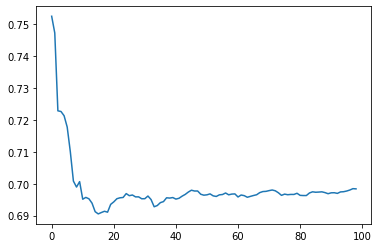

In [25]:
%matplotlib inline
acc_rate=torch.as_tensor(torch.load('HMC_8.pt')[1])
plt.plot(acc_rate)


tensor(0.0020)


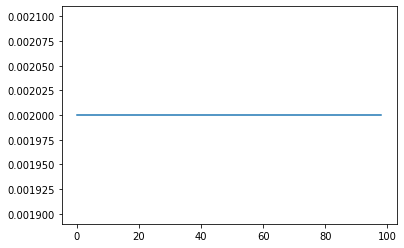

In [33]:
%matplotlib inline
step_sizes=torch.as_tensor(torch.load('HMC_8.pt')[2])
plt.plot(torch.as_tensor(step_sizes))
print(step_sizes[-1])

In [28]:
PTMCMC_theta=torch.as_tensor(torch.load('mlruns/4/1941420c5f8048aa9b5bcfa9f58714da/artifacts/theta.pt'))
HMC_theta2=torch.as_tensor(torch.load('HMC_8.pt')[0][0:-1:2])
#HMC_theta2=torch.as_tensor(torch.load('HMC_2.pt')[0][0:-1:2])

HMC_theta3=torch.as_tensor(torch.load('HMC_3.pt')[0][0:-1:2])
HMC_theta6=torch.as_tensor(torch.load('HMC_6.pt')[0][0:-1:2])




HMC_theta1=torch.load('HMC_1.pt')

#'mlruns/4/1941420c5f8048aa9b5bcfa9f58714da/artifacts/theta.pt')
#mlruns/4/99e4ed7c648f4cee971eb1924dfc52db/artifacts/theta.pt')
#'mlruns/4/0eb6f8d414d1424784fa76fed8506198/artifacts/theta.pt')
#'mlruns/4/814abccf119b4eb1a0f68c1f67dc773f/artifacts/theta.pt')
#'mlruns/4/74654e3a649f4f47a71234edee2e4424/artifacts/theta.pt')[0:-1:1]

HMC_theta6.shape

torch.Size([1250, 151])

6.133233500174975


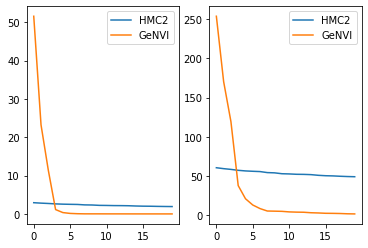

In [29]:
from sklearn.decomposition import PCA
from numpy.linalg import norm

pca = PCA(n_components=20)
pca2 = PCA(n_components=20)
pca_= PCA(n_components=20)
pca.fit(HMC_theta6)
pca2.fit(HMC_theta2)
pca_.fit(GeNVI_theta)
fig,ax=plt.subplots(1,2)
#ax[0].plot(pca.explained_variance_, label='HMC')
ax[0].plot(pca2.explained_variance_, label='HMC2')
ax[0].plot(pca_.explained_variance_, label='GeNVI')
ax[0].legend()

#ax[1].plot(pca.singular_values_,label='HMC')
ax[1].plot(pca2.singular_values_,label='HMC2')
ax[1].plot(pca_.singular_values_, label='GeNVI')
ax[1].legend()

print(norm(pca.mean_-pca_.mean_))

In [30]:
theta_all=torch.cat([HMC_theta1,HMC_theta2,HMC_theta3,HMC_theta6,GeNVI_theta],dim=0)
theta_all_c=torch.cat([0.*torch.ones(HMC_theta1.shape[0]),.1*torch.ones(HMC_theta2.shape[0]),.2*torch.ones(HMC_theta3.shape[0]),.4*torch.ones(HMC_theta6.shape[0]),.5*torch.ones(GeNVI_theta.shape[0])],dim=0)

theta_all.shape[0]==theta_all_c.shape[0]

True

In [34]:
from sklearn.manifold import TSNE
myTSNE=TSNE(n_components=2,init='pca',perplexity=5)
X_embedded_p =myTSNE.fit_transform(theta_all.cpu())
print(myTSNE.kl_divergence_)
X_embedded_p.shape

1.7165220975875854


(6250, 2)

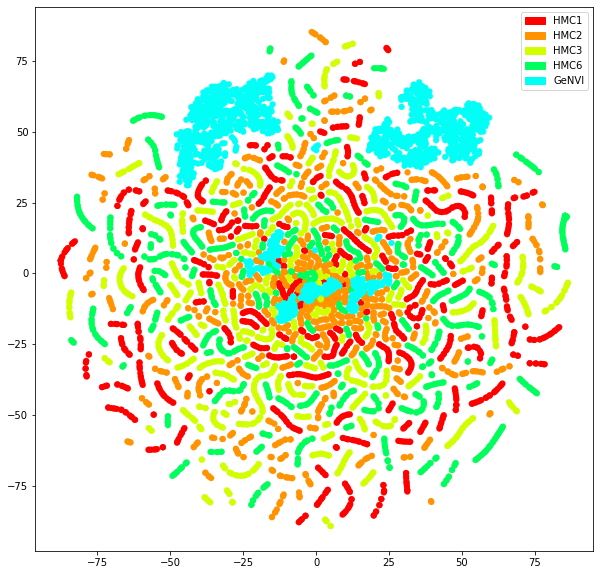

In [32]:
%matplotlib inline

import matplotlib.patches as mpatches

from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

import matplotlib.cm as cm
cmap = cm.hsv

fig = plt.figure(figsize=(10, 10))
#ax = fig.gca(projection='3d')
#ax.scatter(X_embedded_p[:,0],X_embedded_p[:,1],X_embedded_p[:,2], linewidth=0.2, 
#           c=cmap(theta_all_c), cmap=cmap) #c=cmap(theta_all_c),

plt.scatter(X_embedded_p[:,0],X_embedded_p[:,1],#X_embedded_p[:,2],
           linewidth=0.2, 
           c=cmap(theta_all_c), cmap=cmap) #c=cmap(theta_all_c),


#plt.title('3D t-SNE of '+str(param_count)+'-dimensional transformed noise')


G1_patch = mpatches.Patch(color=cmap(0.), label='HMC1')
G2_patch = mpatches.Patch(color=cmap(.1), label='HMC2')
G3_patch = mpatches.Patch(color=cmap(.2), label='HMC3')
G4_patch = mpatches.Patch(color=cmap(.4), label='HMC6')

G5_patch = mpatches.Patch(color=cmap(.5), label='GeNVI')


#PTMCMC_patch = mpatches.Patch(color=cmap(PT_c), label='PTMCMC')
#HMC_patch = mpatches.Patch(color=cmap(HMC_c), label='HMC')
plt.legend(handles=[G1_patch,G2_patch,G3_patch,G4_patch,G5_patch])
#plt.legend(handles=[G1_patch,G2_patch,G3_patch,PTMCMC_patch,HMC_patch])

#ax.view_init(elev=45., azim=300)
plt.savefig('PTMCMC_tSNE.pdf')
plt.show()
plt.show()


In [40]:
def KL(theta0,theta1,k=1):
        """
        Parameters:
            theta0 (Tensor): Samples, P X NbDimensions   
            theta1 (Tensor): Samples, R X NbDimensions   
            k (Int): positive ordinal number 

        Returns:
            (Float) k-Nearest Neighbour Estimation of the KL from theta0 to theta1  

        Kullback-Leibler Divergence Estimation of Continuous Distributions Fernando Pérez-Cruz
        """
        
        n0=theta0.shape[0]
        n1=theta1.shape[0]
        dim0=theta0.shape[1]
        dim1=theta1.shape[1]
        assert dim0 == dim1
        
   
        
        D0=torch.cdist(theta0,theta0)
        D1=torch.cdist(theta0,theta1)
        

        a0 = torch.topk(D0, k=k+1, dim=1, largest=False, sorted=True)[0][:,k]#.clamp(torch.finfo().eps,float('inf')).to(device)
        a1 = torch.topk(D1, k=k, dim=1, largest=False, sorted=True)[0][:,k-1]#.clamp(torch.finfo().eps,float('inf')).to(device)
        
        assert a0.shape == a1.shape
        
        d=torch.as_tensor(float(dim0),device=device)
        N0=torch.as_tensor(float(n0),device=device)
        N1=torch.as_tensor(float(n1),device=device)
        
        Mnn=(torch.log(a1)-torch.log(a0)).mean()
        return dim0*Mnn + N1.log()-(N0-1).log()

In [105]:
N=1000
K=torch.Tensor(N)
P_theta=PTMCMC_theta.to(device)
indices=list(range(P_theta.shape[0]))

for i in range(N):
    np.random.shuffle(indices)
    K[i]=KL(GeN(500).detach(),P_theta[indices[500:]], k=1)

print('KL(GeNVI,PTMCMC): '+str(K.mean())+' ('+str(K.std())+')')

KL(GeNVI,PTMCMC): tensor(259.6710) (tensor(3.1236))


In [106]:
N=1000
K=torch.Tensor(N)
P_theta=HMC_theta.to(device)
indices=list(range(P_theta.shape[0]))

for i in range(N):
    np.random.shuffle(indices)
    K[i]=KL(GeN(500).detach(),P_theta[indices[500:]], k=1)

print('KL(GeNVI,HMC): '+str(K.mean())+' ('+str(K.std())+')')

KL(GeNVI,HMC): tensor(262.6007) (tensor(3.8365))


In [37]:
N=1000
K=torch.Tensor(N)
H_theta=HMC_theta.to(device)
P_theta=HMC_theta2.to(device)
P_indices=list(range(P_theta.shape[0]))
H_indices=list(range(H_theta.shape[0]))

for i in range(N):
    np.random.shuffle(P_indices)
    np.random.shuffle(H_indices)
    K[i]=KL(P_theta[P_indices[500:]],H_theta[H_indices[500:]], k=2)

print('KL(PTMCMC,HMC): '+str(K.mean())+' ('+str(K.std())+')')

NameError: name 'HMC_theta' is not defined

In [35]:
X=torch.arange(-2.,2.,0.02).to(device)
X.shape

torch.Size([200])

In [41]:
N=100
K=torch.Tensor(N)
P_theta_pred=model(X,HMC_theta2.to(device)).squeeze()
#H_theta_pred=model(X,HMC_theta.to(device)).squeeze()


P_indices=list(range(P_theta_pred.shape[0]))
#H_indices=list(range(H_theta.shape[0]))


for i in range(N):
    np.random.shuffle(P_indices)
    GeNVI_pred=model(X,GeN(500).detach()).squeeze()
    K[i]=KL(GeNVI_pred,P_theta_pred[P_indices[500:]], k=2)

print('KL(GeNVI,PTMCMC): '+str(K.mean())+' ('+str(K.std())+')')

KL(GeNVI,PTMCMC): tensor(187.6724) (tensor(7.1207))


In [113]:
N=1000
K=torch.Tensor(N)
P_theta_pred=model(X,HMC_theta2.to(device)).squeeze()
H_theta_pred=model(X,HMC_theta.to(device)).squeeze()


P_indices=list(range(P_theta.shape[0]))
H_indices=list(range(H_theta.shape[0]))


for i in range(N):
    np.random.shuffle(P_indices)
    GeNVI_pred=model(X,GeN(500).detach()).squeeze()
    K[i]=KL(GeNVI_pred,P_theta_pred[P_indices[500:]], k=2)

print('KL(GeNVI,PTMCMC): '+str(K.mean())+' ('+str(K.std())+')')

RuntimeError: CUDA error: device-side assert triggered

In [74]:

for i in range(N):
    np.random.shuffle(P_indices)
    np.random.shuffle(H_indices)
    K[i]=KL(P_theta_pred[P_indices[500:]],H_theta_pred[H_indices[500:]], k=2)

print('KL(PTMC,HMC): '+str(K.mean())+' ('+str(K.std())+')')

KL(PTMC,HMC): tensor(164.7335) (tensor(4.0180))


In [75]:
for i in range(N):
    np.random.shuffle(H_indices)
    GeNVI_pred=model(X,GeN(500).detach()).squeeze()
    K[i]=KL(GeNVI_pred,H_theta_pred[H_indices[500:]], k=2)

print('KL(GeNVI,HMC): '+str(K.mean())+' ('+str(K.std())+')')

KL(GeNVI,HMC): tensor(270.9141) (tensor(10.9764))


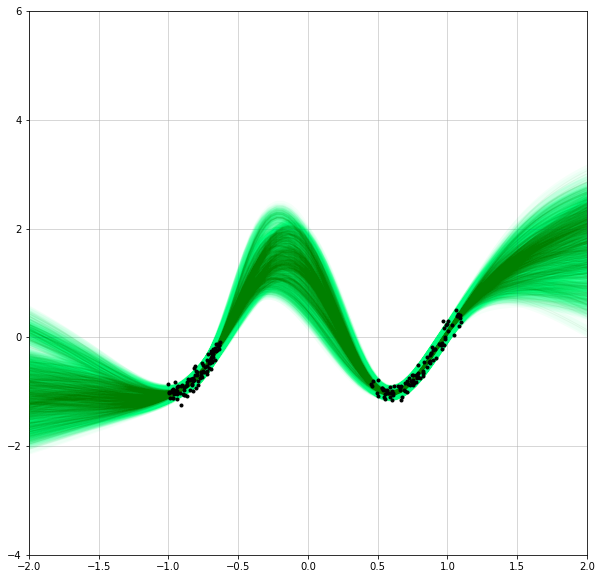

In [44]:
x=setup.makePlot(PTMCMC_theta,device)
x.savefig('PTMCMC_green_pred.png')


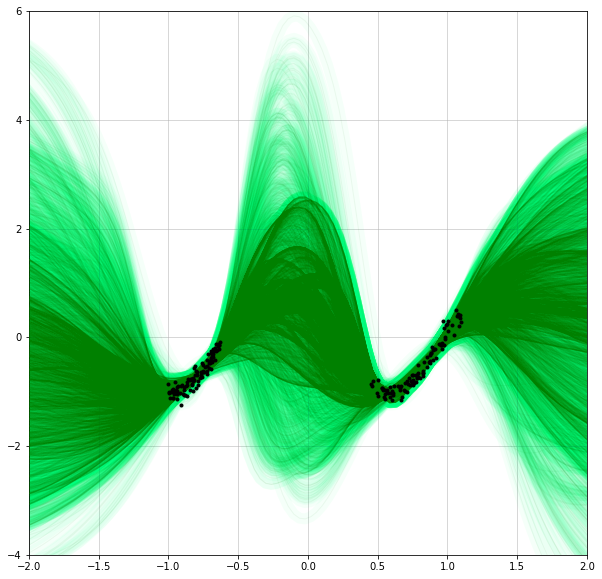

In [47]:
fig=setup.makePlot(GeNVI_theta,device)
fig.savefig('GeNVI_green_pred.svg')

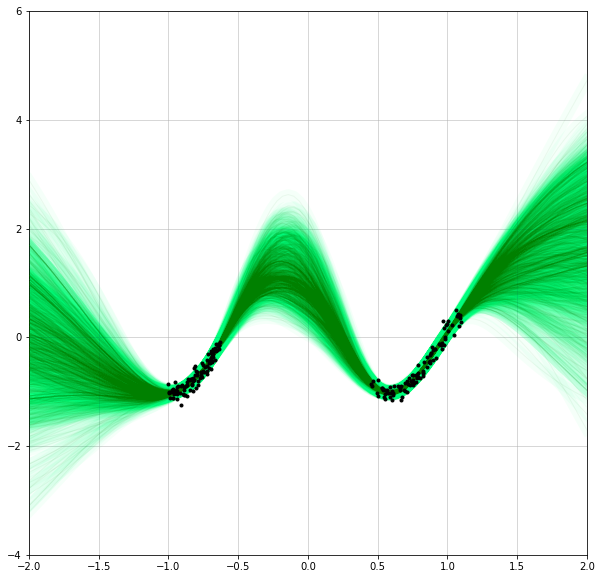

In [179]:
fig=setup.makePlot(HMC_theta2,device)

In [182]:
GeNVI_pred=model(X,GeNVI_theta).squeeze()
P_theta_pred=model(X,PTMCMC_theta.to(device)).squeeze()
H_theta_pred=model(X,HMC_theta.to(device)).squeeze()

theta_pred=torch.cat([GeNVI_pred, P_theta_pred,H_theta_pred],dim=0)
theta_pred.shape

RuntimeError: Expected object of device type cuda but got device type cpu for argument #1 'self' in call to _th_bmm

In [184]:
theta_pred_all=model(X,theta_all.to(device)).squeeze().cpu()

In [187]:
from sklearn.manifold import TSNE
myTSNE=TSNE(n_components=2,init='pca',perplexity=100)
X_embedded_pred =myTSNE.fit_transform(theta_pred_all)
print(myTSNE.kl_divergence_)
X_embedded_pred.shape

1.0501937866210938


(6250, 2)

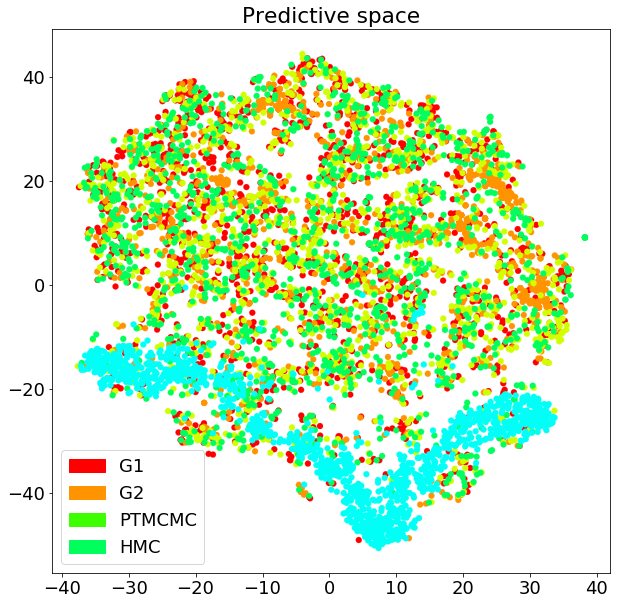

In [188]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches

import matplotlib.cm as cm

cmap = cm.hsv

plt.rcParams.update({'font.size': 18})


fig = plt.figure(figsize=(10, 10))
#ax = fig.gca(projection='3d')
#ax.scatter(X_embedded_pred[:,0],X_embedded_pred[:,1],X_embedded_pred[:,2],c=cmap(theta_all_c), linewidth=0.2)
plt.scatter(X_embedded_pred[:,0],X_embedded_pred[:,1],c=cmap(theta_all_c), linewidth=0.2)
plt.title('Predictive space')
ax.view_init(elev=90., azim=190)

G1_patch = mpatches.Patch(color=cmap(.0), label='G1')
G2_patch = mpatches.Patch(color=cmap(.1), label='G2')
#G3_patch = mpatches.Patch(color=cmap(.2), label='G3')

PT_c=torch.tensor(0.1*(ensemble_size+2)).float()
HMC_c=torch.tensor(0.1*(ensemble_size+3)).float()

PTMCMC_patch = mpatches.Patch(color=cmap(PT_c), label='PTMCMC')
HMC_patch = mpatches.Patch(color=cmap(HMC_c), label='HMC')
plt.legend(handles=[G1_patch,G2_patch,PTMCMC_patch,HMC_patch])
#plt.legend(handles=[G1_patch,G2_patch,G3_patch,PTMCMC_patch,HMC_patch])


plt.savefig('Predictive_tSNE.pdf')
plt.show()

In [46]:
theta=torch.cat([GeN.sample(500).detach()[0],GeN.sample(500).detach()[1], PTMCMC_theta.to(device)],)
c=torch.cat([torch.zeros(500), 0.5*torch.ones(500), torch.ones(1111)])


In [65]:
theta=torch.cat([GeN(N).detach(), PTMCMC_theta.to(device)])
theta.shape

torch.Size([5000, 151])

In [96]:
from sklearn.manifold import TSNE
myTSNE=TSNE(n_components=3,init='pca',perplexity=80)
X_embedded =myTSNE.fit_transform(theta.cpu())
print(myTSNE.kl_divergence_)
X_embedded.shape

1.1433414220809937


(5000, 3)

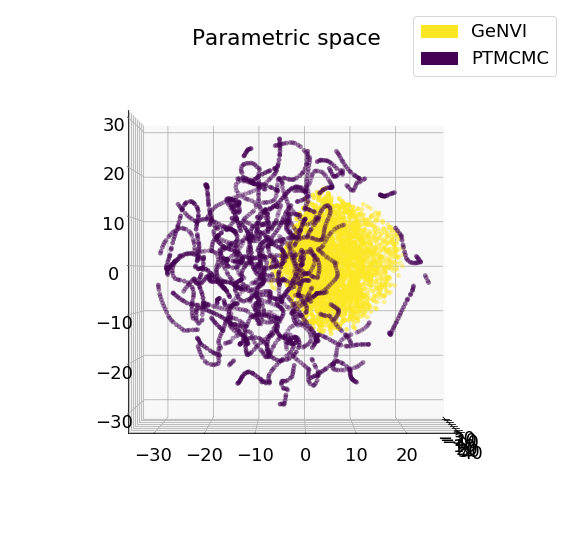

In [98]:
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches

plt.rcParams.update({'font.size': 18})


fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')
ax.scatter(X_embedded[:,0],X_embedded[:,1],X_embedded[:,2],c=c, linewidth=0.2, cmap=cmap)
plt.title('Parametric space')

ax.view_init(elev=0., azim=0)

GeNVI_patch = mpatches.Patch(color=cmap(0.), label='GeNVI')
PTMCMC_patch = mpatches.Patch(color=cmap(1.), label='PTMCMC')
plt.legend(handles=[GeNVI_patch,PTMCMC_patch])

plt.savefig('Parametric_tSNE.pdf')
plt.show()



Text(0.5, 1.0, '134 vs 73')

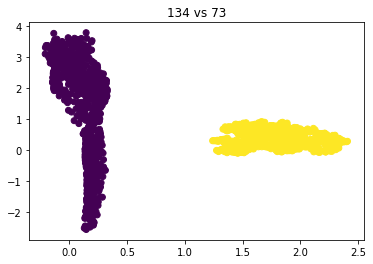

In [59]:
%matplotlib inline
i=np.random.randint(0,theta.shape[1])
j=np.random.randint(0,theta.shape[1])
X=theta[:,i].cpu()
Y=theta[:,j].cpu()
plt.scatter(X,Y, c=c)
plt.title(str(i)+' vs '+str(j))